# Predict whether a mammogram mass is benign or malignant
### Project Design: Mr. Frank Kane
### Project Executed by Dr. Kanad Basu

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Road-Map:

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=19). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression


The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [113]:
%matplotlib inline
import pandas as pd

masses_data = pd.read_csv('mammographic_masses.data.txt')
masses_data.head()

5  67  3 5.1 3.1  1
0  4  43  1   1   ?  1
1  5  58  4   5   3  1
2  4  28  1   1   3  0
3  5  74  1   5   ?  1
4  4  65  1   ?   3  0

Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [114]:
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head(n=10)

BI-RADS   age  shape  margin  density  severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1
5      4.0  65.0    1.0     NaN      3.0         0
6      4.0  70.0    NaN     NaN      3.0         0
7      5.0  42.0    1.0     NaN      3.0         0
8      5.0  57.0    1.0     5.0      3.0         1
9      5.0  60.0    NaN     5.0      1.0         1

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [5]:
masses_data.describe()

BI-RADS         age       shape      margin     density    severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

In [115]:
masses_data.loc[(masses_data['age'].isnull()) |
              (masses_data['shape'].isnull()) |
              (masses_data['margin'].isnull()) |
              (masses_data['density'].isnull())]

BI-RADS   age  shape  margin  density  severity
1        4.0  43.0    1.0     1.0      NaN         1
4        5.0  74.0    1.0     5.0      NaN         1
5        4.0  65.0    1.0     NaN      3.0         0
6        4.0  70.0    NaN     NaN      3.0         0
7        5.0  42.0    1.0     NaN      3.0         0
9        5.0  60.0    NaN     5.0      1.0         1
12       4.0  64.0    1.0     NaN      3.0         0
19       4.0  40.0    1.0     NaN      NaN         0
20       NaN  66.0    NaN     NaN      1.0         1
22       4.0  43.0    1.0     NaN      NaN         0
26       2.0  66.0    1.0     1.0      NaN         0
27       5.0  63.0    3.0     NaN      3.0         0
35       4.0  77.0    3.0     NaN      NaN         0
38       4.0  48.0    4.0     5.0      NaN         1
40       4.0  59.0    2.0     1.0      NaN         0
43       4.0  61.0    2.0     1.0      NaN         0
45       5.0  44.0    2.0     4.0      NaN         1
47       4.0  23.0    1.0     1.0      NaN         0
48       2.0  42.0    NaN     NaN      4.0         0
52       4.0  23.0    1.0     1.0      NaN         0
53       4.0  63.0    2.0     1.0      NaN         0
54       4.0  53.0    NaN     5.0      3.0         1
55       4.0  43.0    3.0     4.0      NaN         0
57       5.0  51.0    2.0     4.0      NaN         0
58       4.0  45.0    2.0     1.0      NaN         0
59       5.0  59.0    2.0     NaN      NaN         1
63       3.0  57.0    2.0     1.0      NaN         0
65       4.0  25.0    2.0     1.0      NaN         0
67       5.0  72.0    4.0     3.0      NaN         1
74       5.0  70.0    NaN     4.0      NaN         1
..       ...   ...    ...     ...      ...       ...
496      4.0  82.0    NaN     5.0      3.0         1
501      5.0  59.0    4.0     4.0      NaN         1
519      3.0  68.0    NaN     NaN      3.0         0
520      4.0  62.0    4.0     NaN      3.0         1
521      5.0  65.0    1.0     NaN      3.0         1
531      4.0  55.0    NaN     NaN      3.0         0
537      5.0  63.0    NaN     4.0      3.0         1
541      4.0  49.0    2.0     NaN      3.0         0
554      5.0  70.0    NaN     5.0      3.0         1
561      2.0  59.0    NaN     4.0      3.0         0
569      4.0  64.0    3.0     4.0      NaN         1
574      4.0  60.0    3.0     NaN      NaN         0
581      2.0  65.0    NaN     1.0      2.0         0
614      3.0  46.0    NaN     5.0      NaN         1
627      4.0  57.0    2.0     1.0      NaN         0
660      4.0  58.0    NaN     4.0      3.0         1
661      4.0  51.0    NaN     4.0      3.0         0
662      3.0  50.0    NaN     NaN      3.0         1
665      4.0  27.0    2.0     1.0      NaN         0
677      4.0  57.0    4.0     4.0      NaN         1
683      5.0   NaN    3.0     3.0      3.0         1
691      4.0  72.0    3.0     NaN      3.0         0
723      4.0  60.0    3.0     NaN      4.0         0
745      6.0  76.0    3.0     NaN      3.0         0
752      5.0  48.0    NaN     4.0      NaN         1
778      4.0  60.0    NaN     4.0      3.0         0
819      4.0  35.0    3.0     NaN      2.0         0
824      6.0  40.0    NaN     3.0      4.0         1
884      5.0   NaN    4.0     4.0      3.0         1
923      5.0   NaN    4.0     3.0      3.0         1

[130 rows x 6 columns]

If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [116]:
masses_data.dropna(inplace=True)
masses_data.describe()

BI-RADS         age       shape      margin     density    severity
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663    0.485542
std      1.888371   14.671782    1.242361    1.567175    0.350936    0.500092
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

## Some Quick Visualization of the data set:

In [117]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [118]:
np.random.seed(sum(map(ord, "distributions")))

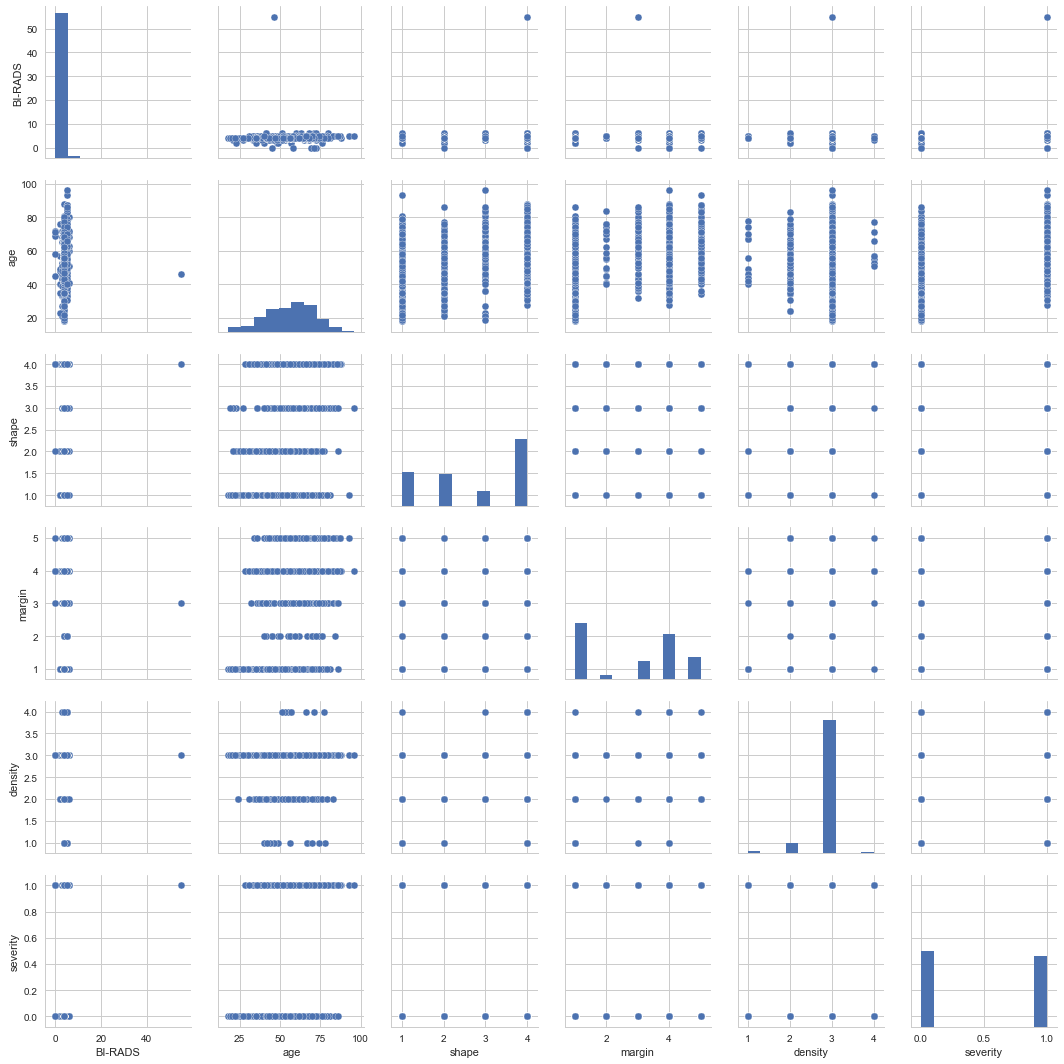

In [119]:
sns.pairplot(masses_data);

ValueError: zero-size array to reduction operation minimum which has no identity

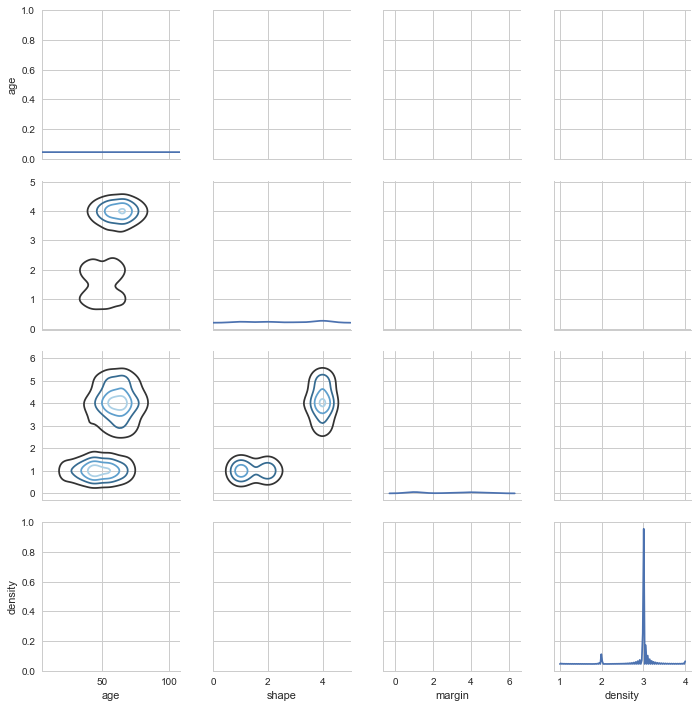

In [126]:
g = sns.PairGrid(masses_data[['age', 'shape',
                             'margin', 'density']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=4);

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [29]:
all_features = masses_data[['age', 'shape',
                             'margin', 'density']].values


all_classes = masses_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

all_features

array([[ 67.,   3.,   5.,   3.],
       [ 58.,   4.,   5.,   3.],
       [ 28.,   1.,   1.,   3.],
       ..., 
       [ 64.,   4.,   5.,   3.],
       [ 66.,   4.,   5.,   3.],
       [ 62.,   3.,   3.,   3.]])

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [30]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ..., 
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

### Test-Train Split of the dataset:

Before moving to K-Fold cross validation and random forests, we start by creating a single train/test split of our data. Here we aside 80 for training, and 20% for testing.

In [11]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=1)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 664 samples.
Testing set has 166 samples.


## Decision Trees



We start with creating a DecisionTreeClassifier and fit it to your training data.

In [36]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

### Display the resulting decision tree.

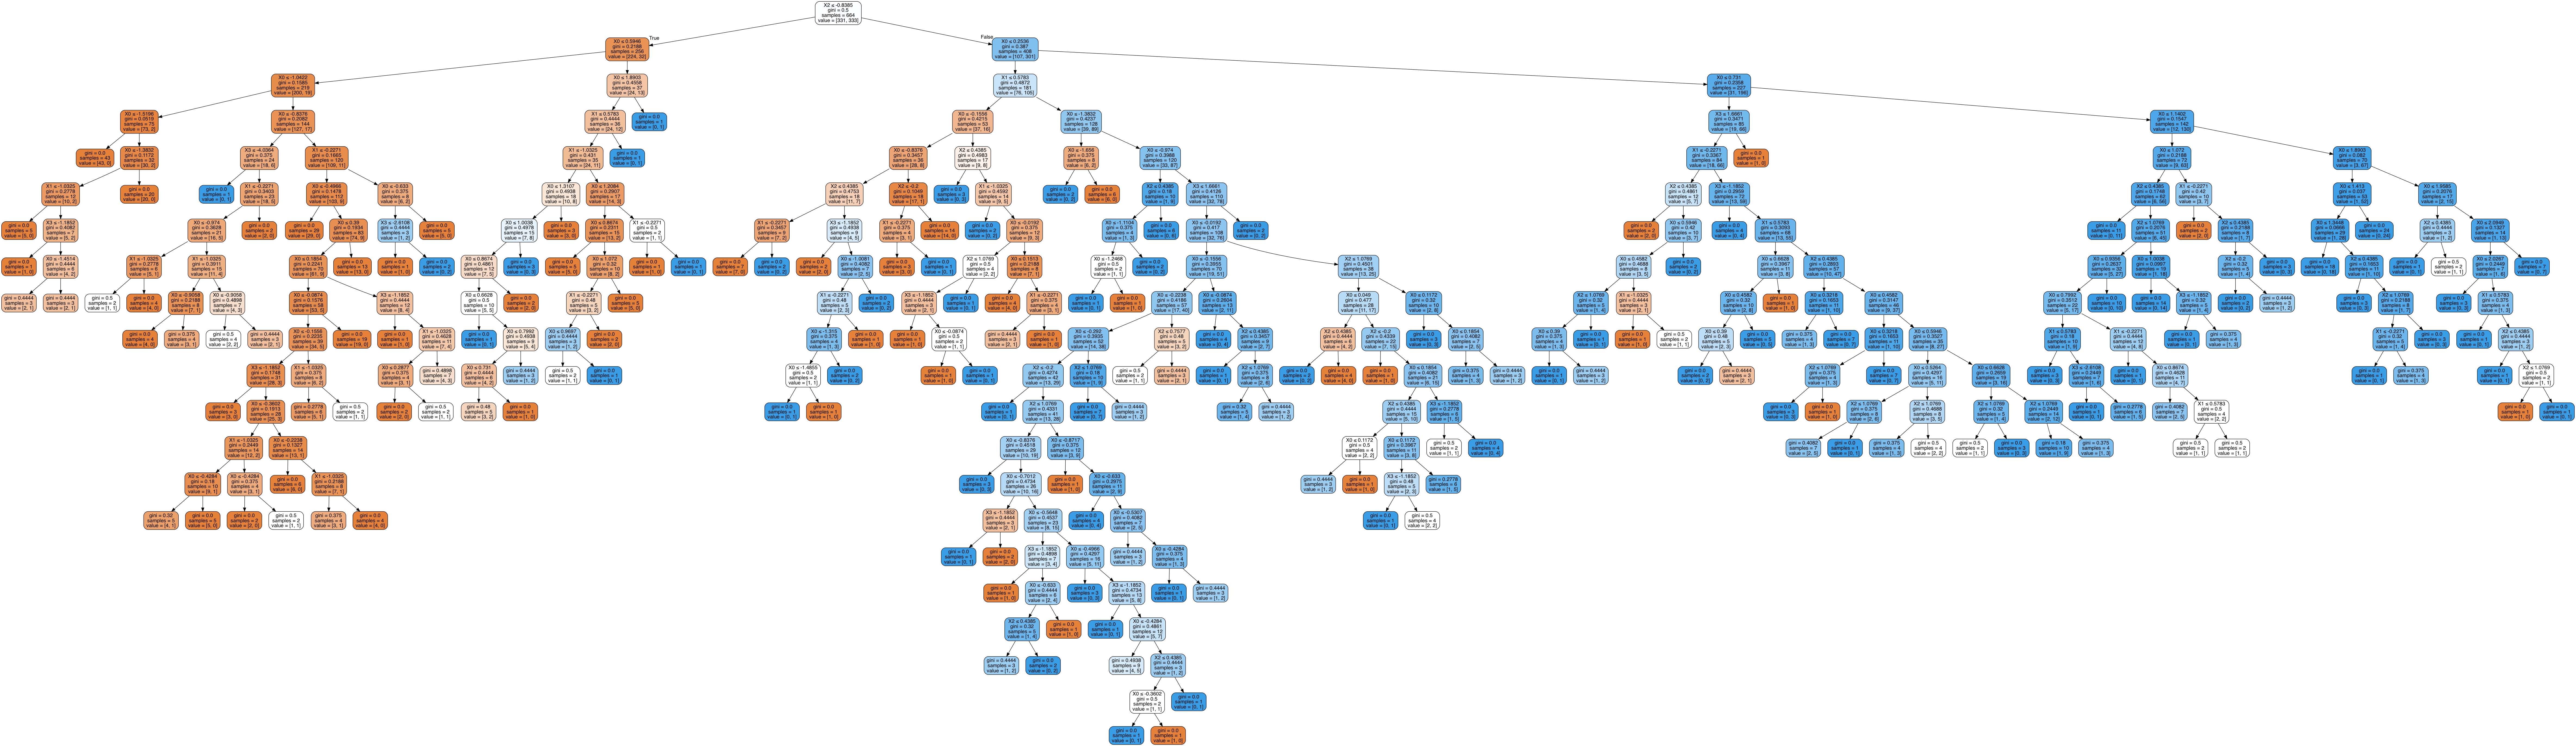

In [45]:
import pydotplus 


dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png()) 

Measure the accuracy of the resulting decision tree model using your test data.

In [46]:
clf.score(X_test, y_test)

0.77710843373493976

Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10). Hint: use model_selection.cross_val_score

In [69]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=19)

cv_scores.mean()

0.7722846580863717

Now try a RandomForestClassifier instead. Does it perform better?

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=17, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=19)

cv_scores.mean()

0.77445693161727436

## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [72]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [73]:
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=19)

cv_scores.mean()

0.79893426307134996

## KNN
How about K-Nearest-Neighbors? Hint: use neighbors.KNeighborsClassifier - it's a lot easier than implementing KNN from scratch like we did earlier in the course. Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [74]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=19)

cv_scores.mean()

0.78802962303574287

Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 10 to 100 and see if K makes a substantial difference. Make a note of the best performance you could get out of KNN.

In [90]:
for n in range(10, 100):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=19)
    print (n, cv_scores.mean())

(10, 0.78802962303574287)
(11, 0.78664243413325408)
(12, 0.78188309038982218)
(13, 0.79526352880086038)
(14, 0.79045102184637062)
(15, 0.79760023737991903)
(16, 0.78903601498460729)
(17, 0.79988501910166532)
(18, 0.78653363500364715)
(19, 0.79137148720992045)
(20, 0.79251449624766623)
(21, 0.79259547741799874)
(22, 0.79017531496111659)
(23, 0.78895132475303831)
(24, 0.79259547741799874)
(25, 0.79134366925064592)
(26, 0.79256765945872432)
(27, 0.78644770841833256)
(28, 0.78538691690466467)
(29, 0.79022847817217456)
(30, 0.7937916496668026)
(31, 0.79134366925064592)
(32, 0.7890323059233707)
(33, 0.7889500883992927)
(34, 0.78530593573433227)
(35, 0.79006527947776417)
(36, 0.79145246838025296)
(37, 0.79142588677472392)
(38, 0.78663872507201749)
(39, 0.78897790635856724)
(40, 0.78663872507201749)
(41, 0.79020189656664552)
(42, 0.78663996142576309)
(43, 0.78661214346648867)
(44, 0.78655774390168498)
(45, 0.78900572431784166)
(46, 0.7902562961314491)
(47, 0.78786271528009588)
(48, 0.790282877

## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up? Hint: you'll need to use MinMaxScaler to get the features in the range MultinomialNB requires.

In [61]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(all_features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, all_classes, cv=10)

cv_scores.mean()

0.78440556651693882

## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Here we just experiented with different kernels such as 'rbf', 'sigmoid', and 'poly' and see what the best-performing kernel is.

### (i) With kernel 'rbf':

In [95]:
def drange2(start, stop, step):
    numelements = int((stop-start)/float(step))
    for i in range(numelements+1):
            yield start + i*step
           
for C in drange2(1, 2, 0.1):
    svc = svm.SVC(kernel='rbf', C=C)
    cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
    print (C, cv_scores.mean())

(1.0, 0.80120237045743958)
(1.1, 0.80239284664791577)
(1.2, 0.8048024852021326)
(1.3, 0.8048024852021326)
(1.4, 0.8048024852021326)
(1.5, 0.80239249681653446)
(1.6, 0.8036120090116563)
(1.7000000000000002, 0.80481682828876477)
(1.8, 0.80481682828876477)
(1.9, 0.80001154443558209)
(2.0, 0.80001154443558209)


### (ii) With kernel 'sigmoid':

In [101]:

for C in drange2(0.01, 0.2, 0.01):
    svc = svm.SVC(kernel='sigmoid', C=C)
    cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
    print (C, cv_scores.mean())

(0.01, 0.80002658718497677)
(0.02, 0.79885045408113287)
(0.03, 0.79641177952227016)
(0.04, 0.79522130333179408)
(0.05, 0.79523564641842626)
(0.060000000000000005, 0.79284035095084171)
(0.06999999999999999, 0.79044505548325705)
(0.08, 0.79044505548325705)
(0.09, 0.78683024782055044)
(0.09999999999999999, 0.78684459090718273)
(0.11, 0.78440591634832013)
(0.12, 0.78083413794551038)
(0.13, 0.78328750542238645)
(0.14, 0.78569749380798459)
(0.15000000000000002, 0.78444894560821687)
(0.16, 0.7820679932272645)
(0.17, 0.78453605362215417)
(0.18000000000000002, 0.78452171053552189)
(0.19, 0.78328785525376765)
(0.2, 0.78076172284958645)


### (iii) With kernel 'poly':

In [104]:
for C in drange2(0.1, 2, 0.1):
    svc = svm.SVC(kernel='poly', C=C)
    cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
    print (C, cv_scores.mean())

(0.1, 0.78926892237941315)
(0.2, 0.78925457929278087)
(0.30000000000000004, 0.78800638092439435)
(0.4, 0.78799203783776206)
(0.5, 0.78919685711487064)
(0.6, 0.79156346640919084)
(0.7000000000000001, 0.79154912332255856)
(0.8, 0.79276863551768062)
(0.9, 0.79397345479478898)
(1.0, 0.79275394259966703)
(1.1, 0.79397345479478898)
(1.2000000000000002, 0.79397345479478898)
(1.3000000000000003, 0.79517827407189745)
(1.4000000000000001, 0.79275394259966703)
(1.5000000000000002, 0.79035864713208237)
(1.6, 0.79156346640919084)
(1.7000000000000002, 0.79156346640919084)
(1.8000000000000003, 0.79034395421406889)
(1.9000000000000001, 0.78793396582847075)


## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.80735835327372207

## Do we have a winner?

Which model, and which choice of hyperparameters, performed the best? 